# Import Dependencies

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import swifter
import nltk
nltk.download('punkt')


/home/abnsol/Documents/KAIM/Nova-Financial-Solutions/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /home/abnsol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load data

In [9]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")

# Preprocessing

In [10]:
df['sentiment'] = df['headline'].swifter.apply(lambda text: TextBlob(str(text)).sentiment.polarity)

Pandas Apply: 100%|██████████| 1407328/1407328 [18:43<00:00, 1253.05it/s]


# Descriptive Stats

In [11]:
print(df.describe())

         Unnamed: 0     sentiment
count  1.407328e+06  1.407328e+06
mean   7.072454e+05  4.905657e-02
std    4.081009e+05  1.830652e-01
min    0.000000e+00 -1.000000e+00
25%    3.538128e+05  0.000000e+00
50%    7.072395e+05  0.000000e+00
75%    1.060710e+06  0.000000e+00
max    1.413848e+06  1.000000e+00


# Plot headline lengths

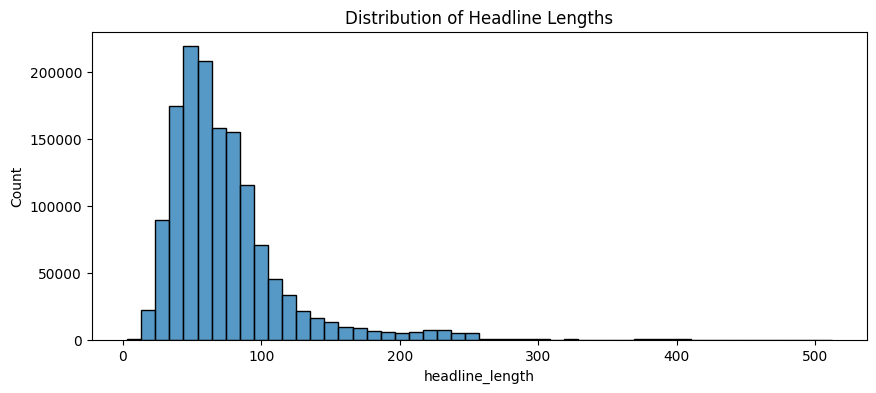

In [13]:
df['headline'] = df['headline'].fillna("")  # Replace NaNs with empty strings
df['headline_length'] = df['headline'].apply(len)

plt.figure(figsize=(10, 4))
sns.histplot(df['headline_length'], bins=50)
plt.title("Distribution of Headline Lengths")
plt.show()

# Sentiment distribution

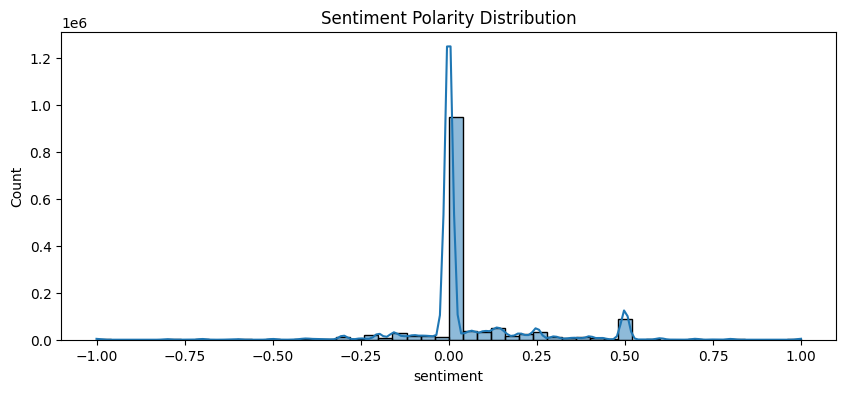

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()

# Articles per publisher

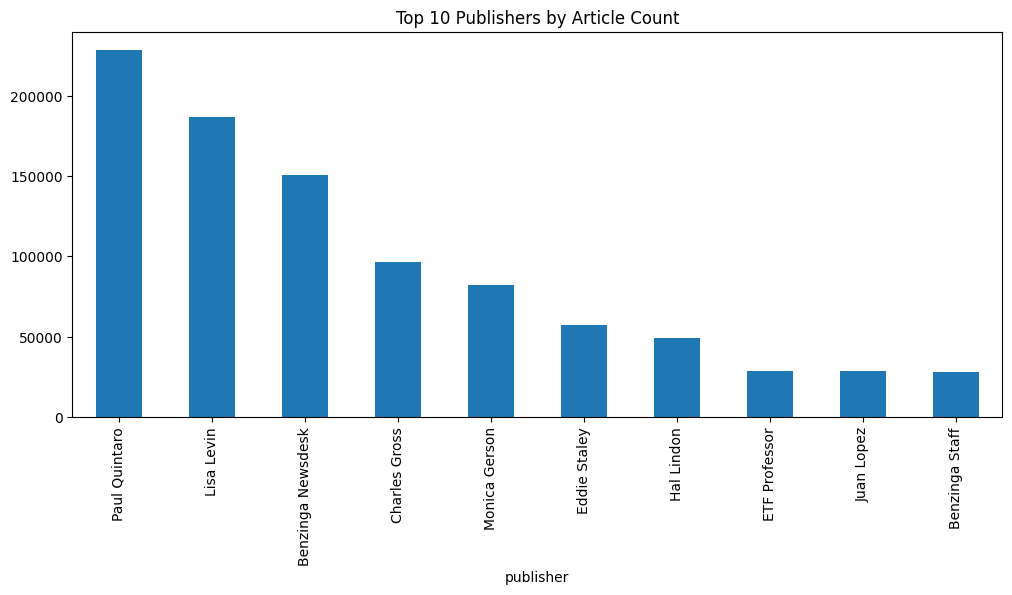

In [15]:

plt.figure(figsize=(12, 5))
df['publisher'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Publishers by Article Count")
plt.show()

# Articles over time

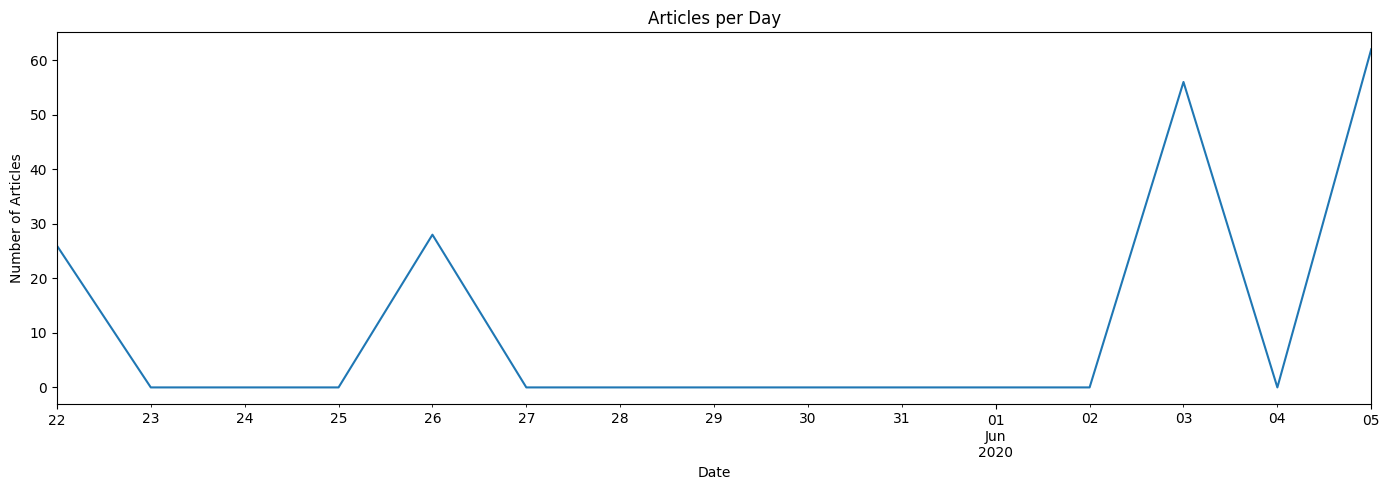

In [18]:
# Parse date safely
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='mixed')

# Drop any rows with failed date parsing
df = df.dropna(subset=['date'])

# Resample and plot
df.set_index('date')['headline'].resample('D').count().plot(
    figsize=(14, 5), title='Articles per Day'
)
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()